In [6]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

# 컬러면 BGR을 RGB로 변환, 흑백이면 흑백으로 출력
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

In [7]:
# Tesseract 프로그램, pip install pytesseract 둘 다 설치 후
import pytesseract
#설치 프로그램 경로 설정
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

1


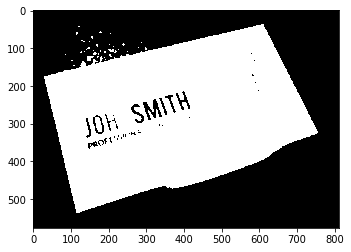

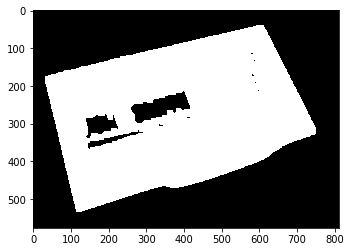

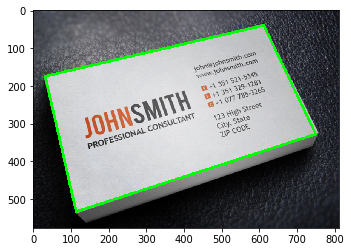

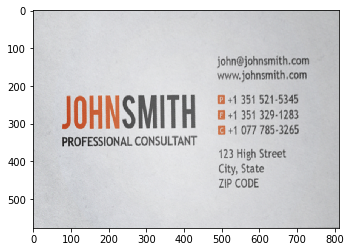

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www.johnsmith.com

+4 354 521-5345
fi +1 351 329-1283
+1 077 785-3265

123 High Street
City, State
ZIP CODE


In [9]:
img = cv2.imread('namecard.png')
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray, (9,9), 0)
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=7)

contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL:외곽만

print(len(contours))

length = cv2.arcLength(contours[0], True)  #도형 윤곽 길이, 폐곡선 여부 True
approx = cv2.approxPolyDP(contours[0], 0.02 * length, True) #얼마나 꺾이는지 확인, 꼭지점 위치
cv2.drawContours(img_copy, [approx], -1, (0,255,0),5)

# imshow('', img_blur)
imshow('', binary)
imshow('', opening)
imshow('', img_copy)

height, width = img.shape[:2]
point_list = approx
pts1 = np.float32([list(point_list[1]),
                   list(point_list[0]),
                   list(point_list[2]),
                   list(point_list[3])])
# print(pts1)
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])
# print(pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# print(M)
img_result = cv2.warpPerspective(img, M, (width, height))
imshow('', img_result)
str = pytesseract.image_to_string(img_result)
print(str)